In [1]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [ ]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [ ]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

In [6]:
X_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

In [8]:
X_train = X_train.float()
X_test = X_test.float()

In [9]:
X_train.shape, X_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [10]:
y_train.shape, y_test.shape

(torch.Size([60000]), torch.Size([10000]))

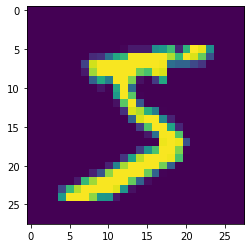

tensor(5)


In [11]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [12]:
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

In [27]:
class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10) 
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x
    
mnist_net = MNISTNet(100)

In [ ]:
# torch.cuda.is_available()

In [ ]:
# !nvidia-smi

In [ ]:
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# mnist_net = mnist_net.to(device)
# list(mnist_net.parameters())

In [28]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)

In [29]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

# X_test = X_test.to(device)
# y_test = y_test.to(device)

for epoch in range(10000):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes] #.to(device)
        y_batch = y_train[batch_indexes] #.to(device)
        
        preds = mnist_net.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()

    test_preds = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test))
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy)
    print(accuracy)

tensor(0.9077)
tensor(0.9146)
tensor(0.9236)
tensor(0.9268)
tensor(0.9244)
tensor(0.9258)
tensor(0.9303)
tensor(0.9273)
tensor(0.9320)
tensor(0.9328)
tensor(0.9391)
tensor(0.9335)
tensor(0.9337)
tensor(0.9343)
tensor(0.9374)
tensor(0.9405)
tensor(0.9413)
tensor(0.9423)
tensor(0.9372)
tensor(0.9366)
tensor(0.9388)
tensor(0.9412)
tensor(0.9423)
tensor(0.9459)
tensor(0.9380)
tensor(0.9417)
tensor(0.9412)
tensor(0.9418)
tensor(0.9441)
tensor(0.9444)
tensor(0.9486)
tensor(0.9443)
tensor(0.9434)
tensor(0.9450)
tensor(0.9449)
tensor(0.9429)
tensor(0.9472)
tensor(0.9451)
tensor(0.9513)
tensor(0.9494)
tensor(0.9453)
tensor(0.9506)
tensor(0.9505)
tensor(0.9509)
tensor(0.9516)
tensor(0.9519)
tensor(0.9483)
tensor(0.9511)
tensor(0.9508)
tensor(0.9532)
tensor(0.9501)
tensor(0.9493)
tensor(0.9534)
tensor(0.9514)
tensor(0.9506)
tensor(0.9537)
tensor(0.9511)
tensor(0.9514)
tensor(0.9514)
tensor(0.9559)
tensor(0.9544)
tensor(0.9524)
tensor(0.9534)
tensor(0.9512)
tensor(0.9512)
tensor(0.9512)
tensor(0.9

KeyboardInterrupt: 

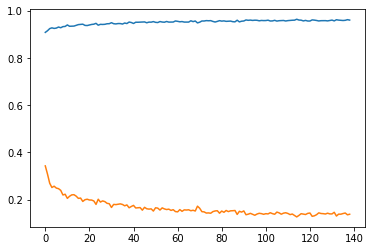

In [34]:
plt.plot(test_accuracy_history)
plt.plot([i.detach().numpy() for i in test_loss_history]);

# seminar last tasks

In [46]:
import torch

# Сперва создадим тензор x:
x = torch.tensor([[10., 20.]])

# Оригинальный полносвязный слой с 2-мя входами и 3-мя нейронами (выходами):
fc = torch.nn.Linear(2, 3)

# Веса fc-слоя хранятся в fc.weight, а bias'ы соответственно в fc.bias
# fc.weight и fc.bias по умолчанию инициализируются случайными числами

# Давайте проставим свои значения в веса и bias'ы:
w = torch.tensor([[11., 12.], [21., 22.], [31., 32]])
fc.weight.data = w

b = torch.tensor([[31., 32., 33.]])
fc.bias.data = b

# Получим выход fc-слоя:
fc_out = fc(x)

# Попробуем теперь получить аналогичные выходы с помощью матричного перемножения:
# fc_out_alternative =  # x * w^T + b
# fc_out_alternative =  x @ w.transpose(0,1) + b
fc_out_alternative =  x @ w.T + b

# Проверка осуществляется автоматически вызовом функции
print(fc_out == fc_out_alternative)
# (раскомментируйте, если решаете задачу локально)

tensor([[True, True, True]])


In [49]:
import torch

# Сперва создадим тензор x:
x = torch.tensor([[10., 20.]])

# Оригинальный полносвязный слой с 2-мя входами и 3-мя нейронами (выходами):
fc = torch.nn.Linear(2, 3)

# Веса fc-слоя хранятся в fc.weight, а bias'ы соответственно в fc.bias
# fc.weight и fc.bias по умолчанию инициализируются случайными числами

# Давайте проставим свои значения в веса и bias'ы:
w = torch.tensor([[11., 12.], [21., 22.], [31., 32]])
fc.weight.data = w

b = torch.tensor([[31., 32., 33.]])
fc.bias.data = b

# Получим выход fc-слоя:
fc_out = fc(x)
# Просуммируем выход fc-слоя, чтобы получить скаляр:
fc_out_summed = fc_out.sum()

# Посчитаем градиенты формулы fc_out_summed:
fc_out_summed.backward()
weight_grad = fc.weight.grad
bias_grad = fc.bias.grad

# Ok, теперь воспроизведем вычисления выше но без fc-слоя:
# Проставим, что у "w" и "b" нужно вычислять градиенты (для fc-слоя это произошло автоматически):
w.requires_grad_(True)
b.requires_grad_(True)

# Получим выход нашей формулы:
our_formula = (x @ w.T + b).sum() # SUM{x * w^T + b}

# Сделайте backward для нашей формулы:
our_formula.backward()

# Проверка осуществляется автоматически, вызовом функций:
# print('fc_weight_grad:', weight_grad)
# print('our_weight_grad:', w.grad)
# print('fc_bias_grad:', bias_grad)
# print('out_bias_grad:', b.grad)
# (раскомментируйте, если работаете над задачей локально)

fc_weight_grad: tensor([[10., 20.],
        [10., 20.],
        [10., 20.]])
our_weight_grad: tensor([[10., 20.],
        [10., 20.],
        [10., 20.]])
fc_bias_grad: tensor([[1., 1., 1.]])
out_bias_grad: tensor([[1., 1., 1.]])
